# **Project Name**    - Netflix Movies and TV-shows Segmentation




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Author - Balaji J**

# **Project Summary -**

Netflix Movies and TV-shows Segmentation is the the unsupervised Machine Learning problem. In this problem by goal is to first make the usable for analysing and clustering process. The first step I did after importing the dataset is knowing the basic information about the dataset. After that I planned the Data Wrangling part and Data preprocessing steps. First I converted a date feature is by default loaded as the object to pandas datetime object so that I can use that feature easily for future purpose as datetime object gives many predefined methods to specifically work with date.

Next I didn't handled the missing values in the dataset, because the missing data in appeared in some features with less in numbers so we can use that for EDA which doesn't make any difference. Next thing is I going to use the text based feature that is "Description" for training machine learning model. These are the reason behind of not handling the missing values.

The next step is text preprocessing, before making this feature into meaningful multi-dimensional vector, I need to do some preprocessing steps that is changing to lowercase, then removed punctual, stopping words and extra white spaces, etc..

Finally,
I used the TfidVector to change the text data into  numerical,I chose 400 as the maximum features so each review observation will be converted into 400 length features.

Then after converting this vector the next step is building clustering machine learning models. I tried three different models, the first one is K-means, then I tried Hierarchical Clustering and finally DBSCAN algorithm.




# **GitHub Link -**

https://github.com/balaji-89/Netflix_Movies_Segmentation


# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
We need to do:

Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [47]:
# Import Libraries
# Import Libraries
# Import Libraries# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings


#text preprocessing libraries
import contractions
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer



from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import make_column_transformer


#avoid warnings
warnings.filterwarnings("ignore")




### Dataset Loading

In [48]:
# Load Dataset


def load_data(path):
    ''' 
    Description : It featches the csv data from the specified location 
                  and returns it as Dataframe object

    Parameters : 
      'path' - Holding path of the xlsx data located.
    '''
    return pd.read_csv(path)


#loading data
df = load_data('../Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [49]:
df_copy = df.copy(deep = True)

In [50]:
# Dataset First Look
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [51]:
# Dataset Rows & Columns count
print("Total Rows: ", df.shape[0])
print("Total Columns: ", df.shape[1])

Total Rows:  7787
Total Columns:  12


### Dataset Information

In [52]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [53]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

0

#### Missing Values/Null Values

In [54]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0, 0.5, 'Total Number of NaN values')

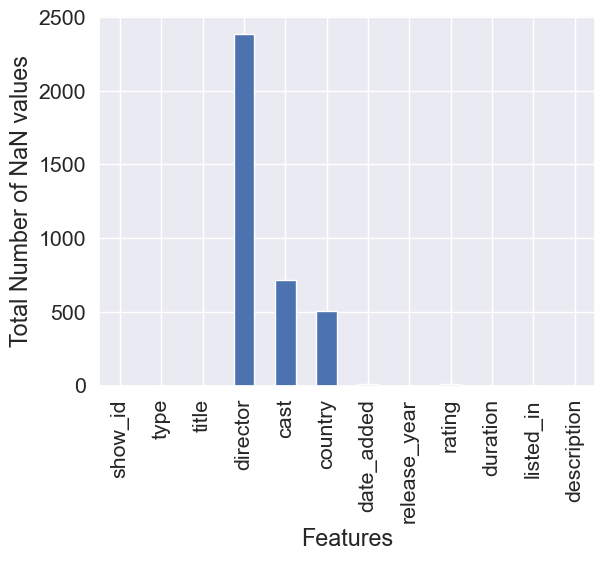

In [55]:
# Visualizing the missing values


df.isnull().sum().plot(kind= 'bar')
plt.xlabel('Features')
plt.ylabel("Total Number of NaN values")


### What did you know about your dataset?

This is a Unsupervised machine project which means we don't have any target variable. This dataset contains 12 features and 7787 observations. Initially it had some duplicated observations and I removed that.
This dataset contains movies and series details. And it has some categorical, Text (Description), and Numbers too. Finally there is four features with NaN values director, cast, country and date_added

## ***2. Understanding Your Variables***

In [56]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [57]:
#Categorical Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id : Unique ID and it is not useful much.
type : This describes whether the particular observation is series or a movie
title : This is the title of the movie or show
director : Name of the director
cast : cast information
country: Name of the country where the movie/series are belongs to.
date_added : Date is added in Netflix
release_year : the date it was actually released.
rating : Tv rating of the show
.....


### Check Unique Values for each variable.

In [58]:
# Check Unique Values for each variable.

#Calculaing unique values for most continous cols might not give any insight. Sometime I may want to display 
#unique values of only catgorical/object dtypes so I created function here.

def unique_counts(df1):
   for i in df1.columns:
       count = df1[i].nunique()
       print(i, ": ", count)



In [59]:
#printing unique value of only object cols
unique_counts(df)

show_id :  7787
type :  2
title :  7787
director :  4049
cast :  6831
country :  681
date_added :  1565
release_year :  73
rating :  14
duration :  216
listed_in :  492
description :  7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [60]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [61]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
398,s399,TV Show,Alien Worlds,NaN,NaN,United Kingdom,"December 2, 2020",2020,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Applying the laws of life on Earth to the rest...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
6692,s6693,Movie,The Muppets,James Bobin,"Jason Segel, Amy Adams, Chris Cooper, Rashida ...",United States,"September 1, 2020",2011,PG,104 min,"Children & Family Movies, Comedies",When the Muppets learn that their beloved thea...
6062,s6063,Movie,The Adderall Diaries,Pamela Romanowsky,"James Franco, Ed Harris, Amber Heard, Jim Parr...",United States,"July 15, 2018",2015,R,87 min,"Dramas, Thrillers",Author Stephen Elliott has a problem separatin...
7594,s7595,Movie,White Chamber,Paul Raschid,"Shauna MacDonald, Oded Fehr, Amrita Acharia, S...",United Kingdom,"August 1, 2019",2018,TV-MA,89 min,"Sci-Fi & Fantasy, Thrillers","When a civil war ravages the UK, a scientist a..."


In [62]:
# Write your code to make your dataset analysis ready.

#changing date_added feature into pandas datetime

def handle_date_added_feature(date_added_values):
    fin_date = []
    for date in date_added_values:
        if pd.isna(date):
            fin_date.append(np.nan)
        else:
            #extracting day
            day = date.split()[1]
            day = int(day[:-1])
            #extracting month
            month = date.split()[0]
            month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
            month =  month_map[month]
            #extracting year
            year = date.split()[-1]
            fin_date.append(f'{year}-{month}-{day}')
    #returning as datetime
    return pd.to_datetime(fin_date)
   


In [63]:
df['date_added'] =  handle_date_added_feature(df.date_added)


In [64]:
df['cast'] = df['cast'].apply(lambda x : np.nan if pd.isna(x) else x.split(','))

### What all manipulations have you done and insights you found?

This is unsupervised problem, so we going to use most of the features for EDA and our goal is to cluster based on the text features and I not going to spend much time in imputing Missing values and this wrangling I converted the date_added feature to pandas dataframe to use that feature effectively. Finally I changed the listed_in and cast to list so that we can use that in EDA little more easily.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

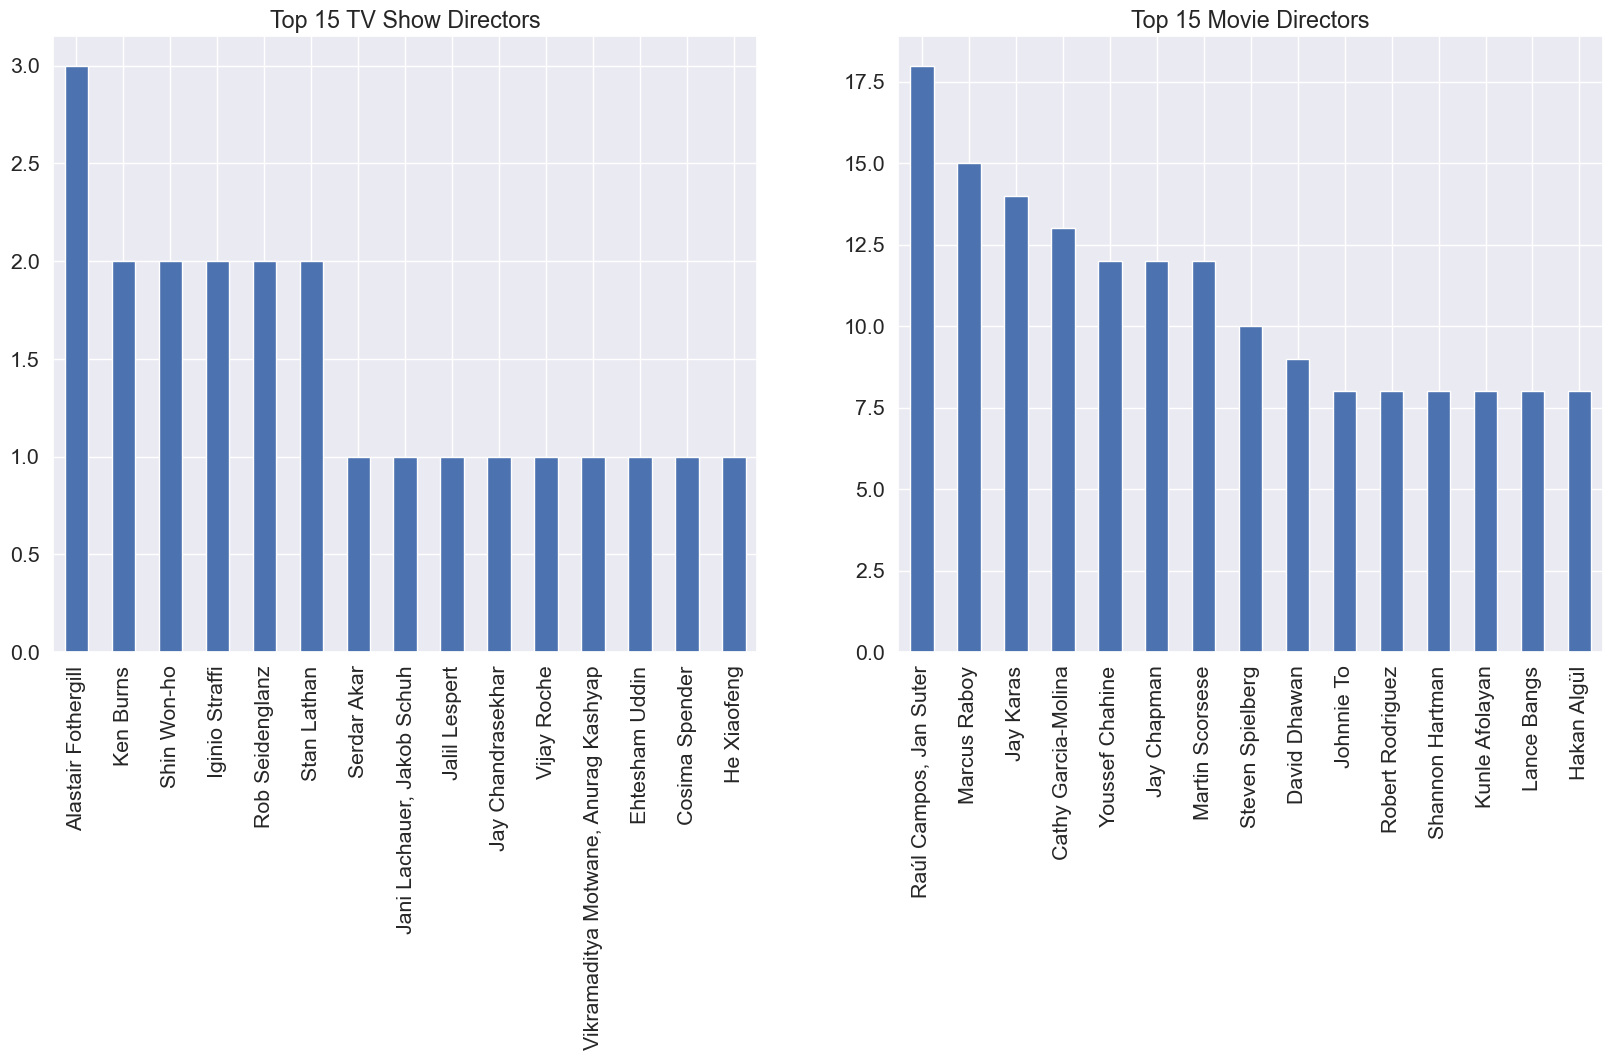

In [65]:
# Chart - 1 visualization code
tv_show = df[df.type == 'TV Show']
movie = df[df.type == 'Movie']


fig, (ax1, ax2) = plt.subplots(1,2)
tv_show.director.value_counts()[:15].plot(kind='bar',ax = ax1,title='Top 15 TV Show Directors',figsize = (20,8))
movie.director.value_counts()[:15].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Directors',figsize = (20,8))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is directors name and on y-axis it is count of their their movies/Tvshows in our dataset.

##### 2. What is/are the insight(s) found from the chart?

Alastair Fothergill directed most TV shows in our dataset with total count of 3 TV Shows. Raul Campos is the directed most films in our Movie category with the total movie count of 18.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These directors must be talented directors as the producers, there should be more fan base for these directors so Netflix can tieup with them to do a project only for Netflix, so that Netflix can make more money from that and their is no need to pay for the rights too.

#### Chart - 2

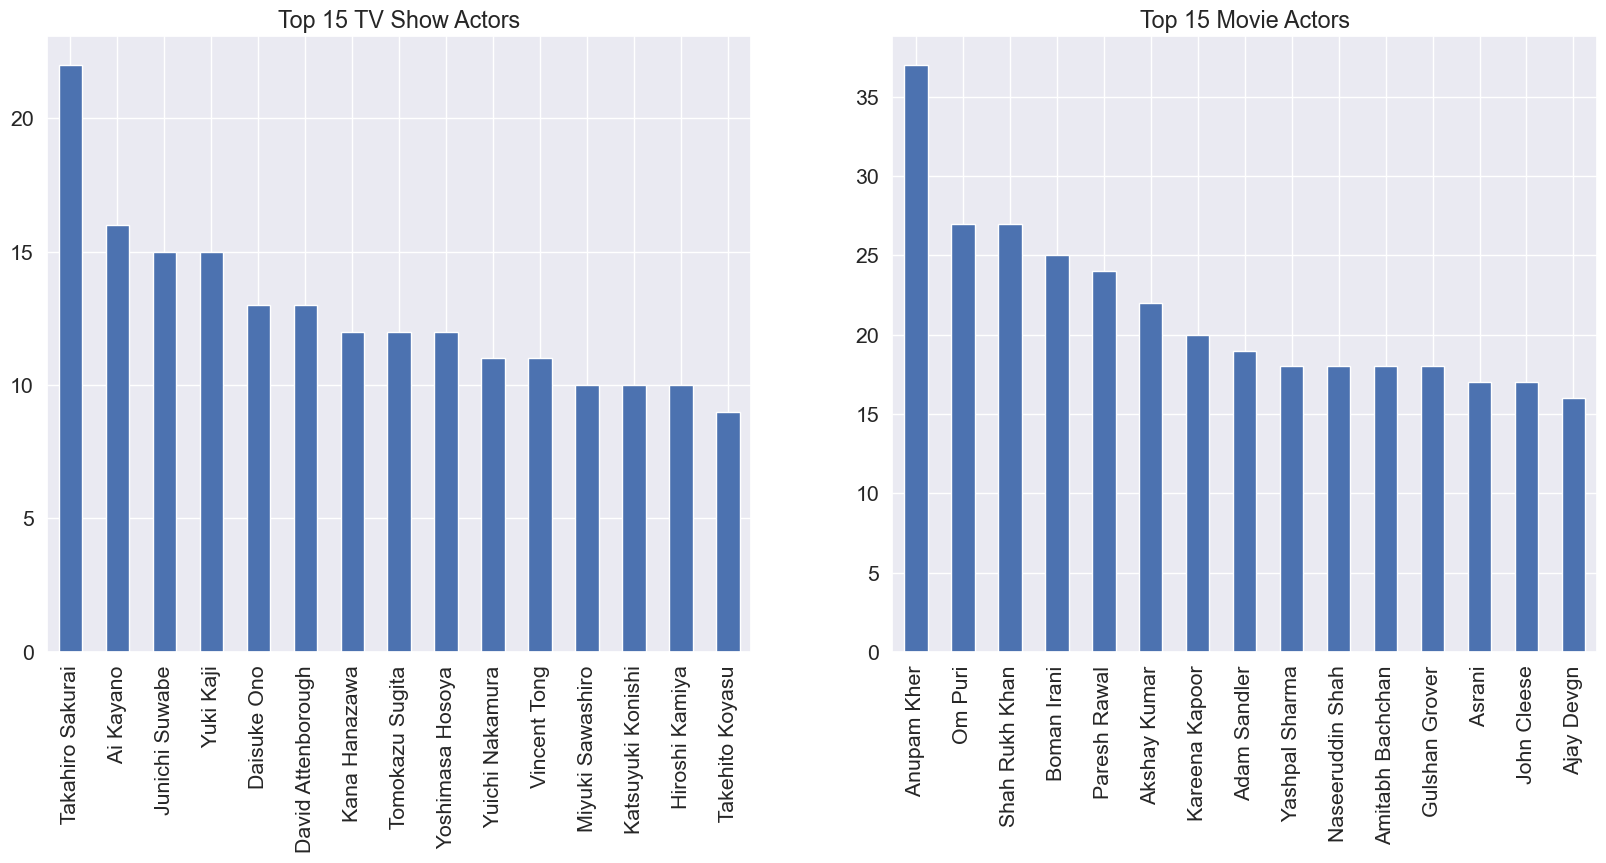

In [66]:
# Chart - 2 visualization code
tv_show_cst = []
for obs in tv_show.iterrows():
    if type(obs[1]['cast']) is list:
        tv_show_cst.extend(obs[1]['cast'])

movie_cst = []
for obs in movie.iterrows():
    if type(obs[1]['cast']) is list:
        movie_cst.extend(obs[1]['cast'])


fig, (ax1, ax2) = plt.subplots(1,2)
pd.Series(tv_show_cst).value_counts()[:15].plot(kind='bar',ax = ax1,title='Top 15 TV Show Actors',figsize = (20,8))
pd.Series(movie_cst).value_counts()[:15].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Actors',figsize = (20,8))
plt.show()

del tv_show_cst,movie_cst


##### 1. Why did you pick the specific chart?

Answer Here. I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is actors name and on y-axis it is count of their movies/Tvshows in our dataset.

##### 2. What is/are the insight(s) found from the chart?

Takahiro Sakurai acted most TV shows in our dataset with total count of 25 TV Shows. Anupam Kher is the acted most films in our Movie category with the total movie count of 32.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No business insights from the above chart

#### Chart - 3

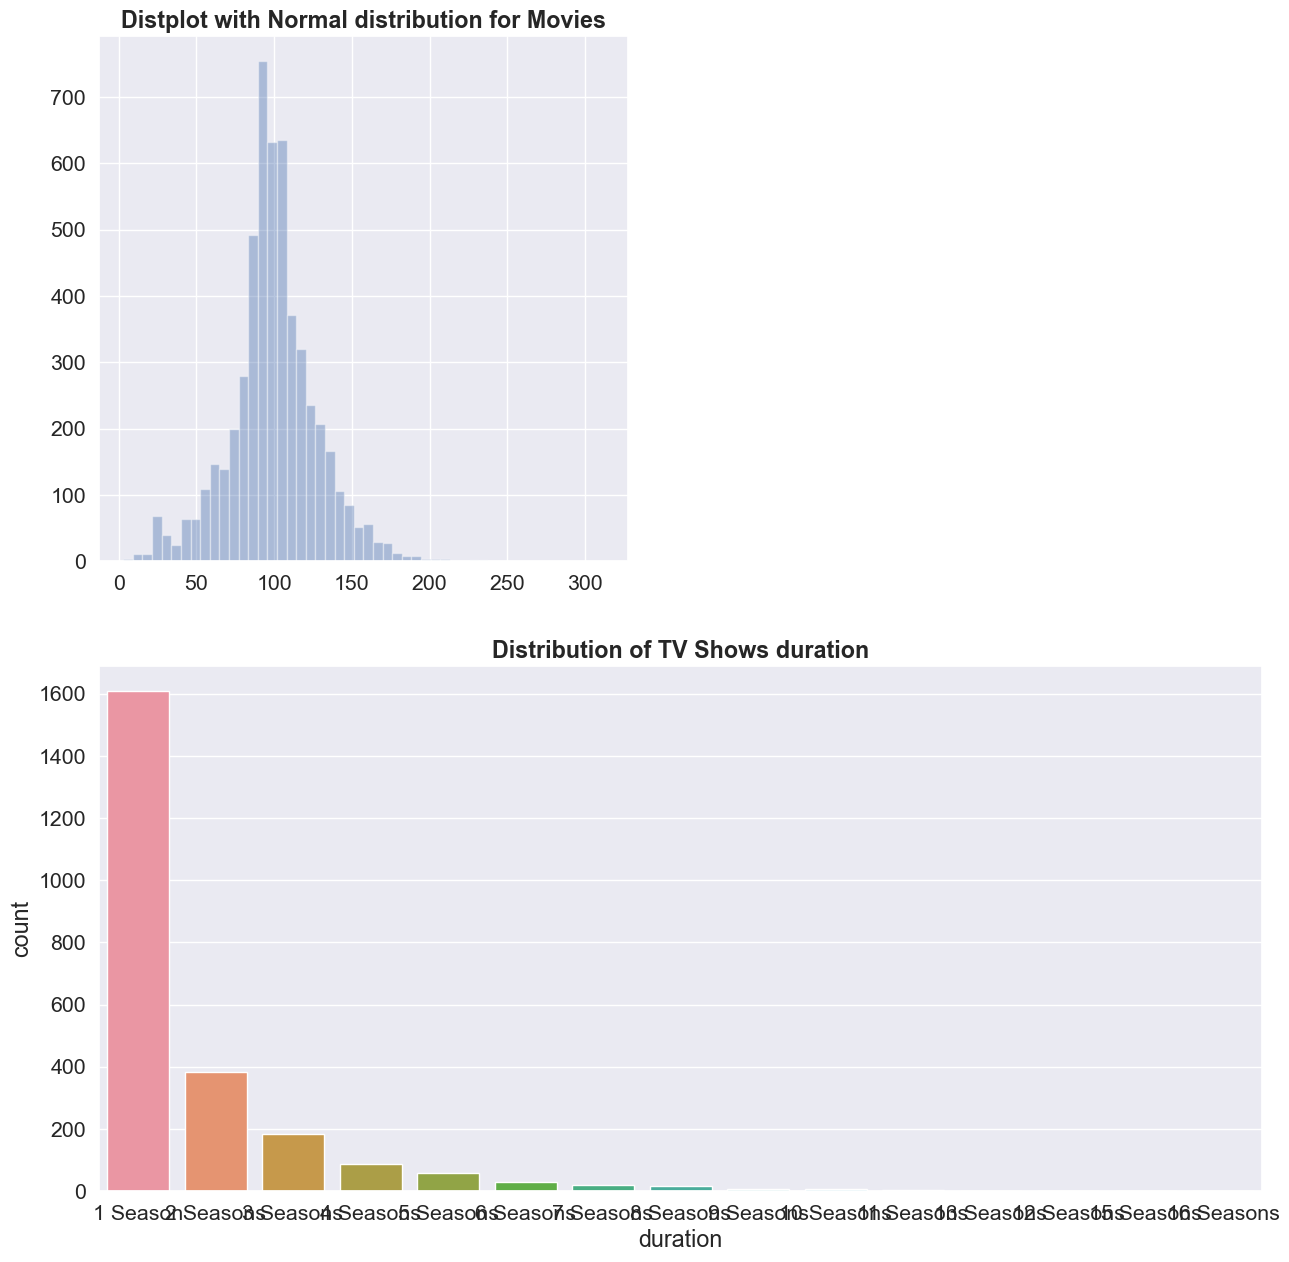

In [67]:
# Chart - 3 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False)
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")

#Checking the distribution of TV SHOWS
plt.subplot(2,1,2)
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)
plt.show()

##### 1. Why did you pick the specific chart?

I used histogram to find the distribution between movie and its duration and I used bar-graph to find the distribution between Tv_show and its duration


##### 2. What is/are the insight(s) found from the chart?

Most TV shows in our dataset is released in only one season almost 1600 and Most films released, has 800 minutes duration and it is normaly distributed.

#### Chart - 4

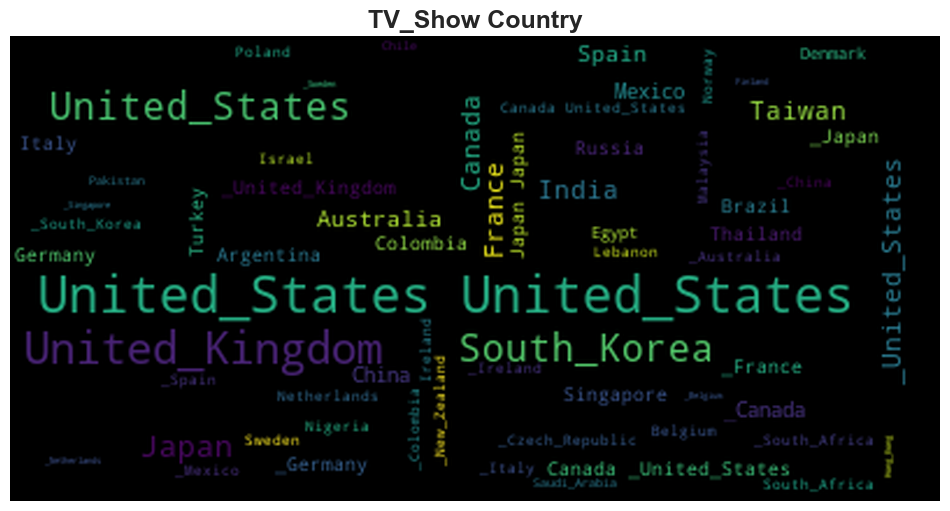

In [68]:
# Chart - 4 visualization code
from wordcloud import WordCloud, STOPWORDS



#Checking the distribution of TV SHOWS
df_word_cloud = tv_show['country'].dropna()
text = " ".join([word.strip().replace(' ','_') for word in df_word_cloud])
wordcloud = WordCloud(background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("off")
plt.title('TV_Show Country', fontsize=18, fontweight='bold')
plt.show()




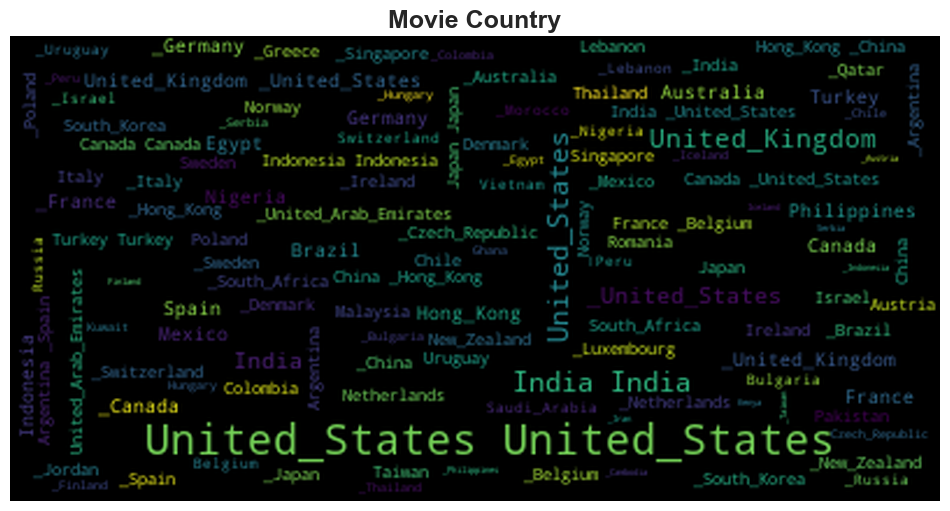

In [69]:
df_word_cloud = movie['country'].dropna()
text = " ".join([word.strip().replace(' ','_') for word in df_word_cloud])
wordcloud = WordCloud(background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("off")
plt.title('Movie Country', fontsize=18, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

It is the fancy way to find the most number of repeated data/string. It differentiate category by its frequency using  size of font which represents that category.

##### 2. What is/are the insight(s) found from the chart?

Netflix has more number of TV_shows and Movies belongs to United States, we could guess this easily as Netflix belongs to America so It would be their first market preference.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having more movies and TV_show from United States is actually good for Netflix because as it from United States it should be an English content, and we know that many contry's people know English as their secondary languaage, so it would be become biggest profit for Netflix has they can make the same content available for other countries. So without making any addtional efforts they can make money from other country citizens too because of the language and the quality of the content.

#### Chart - 5

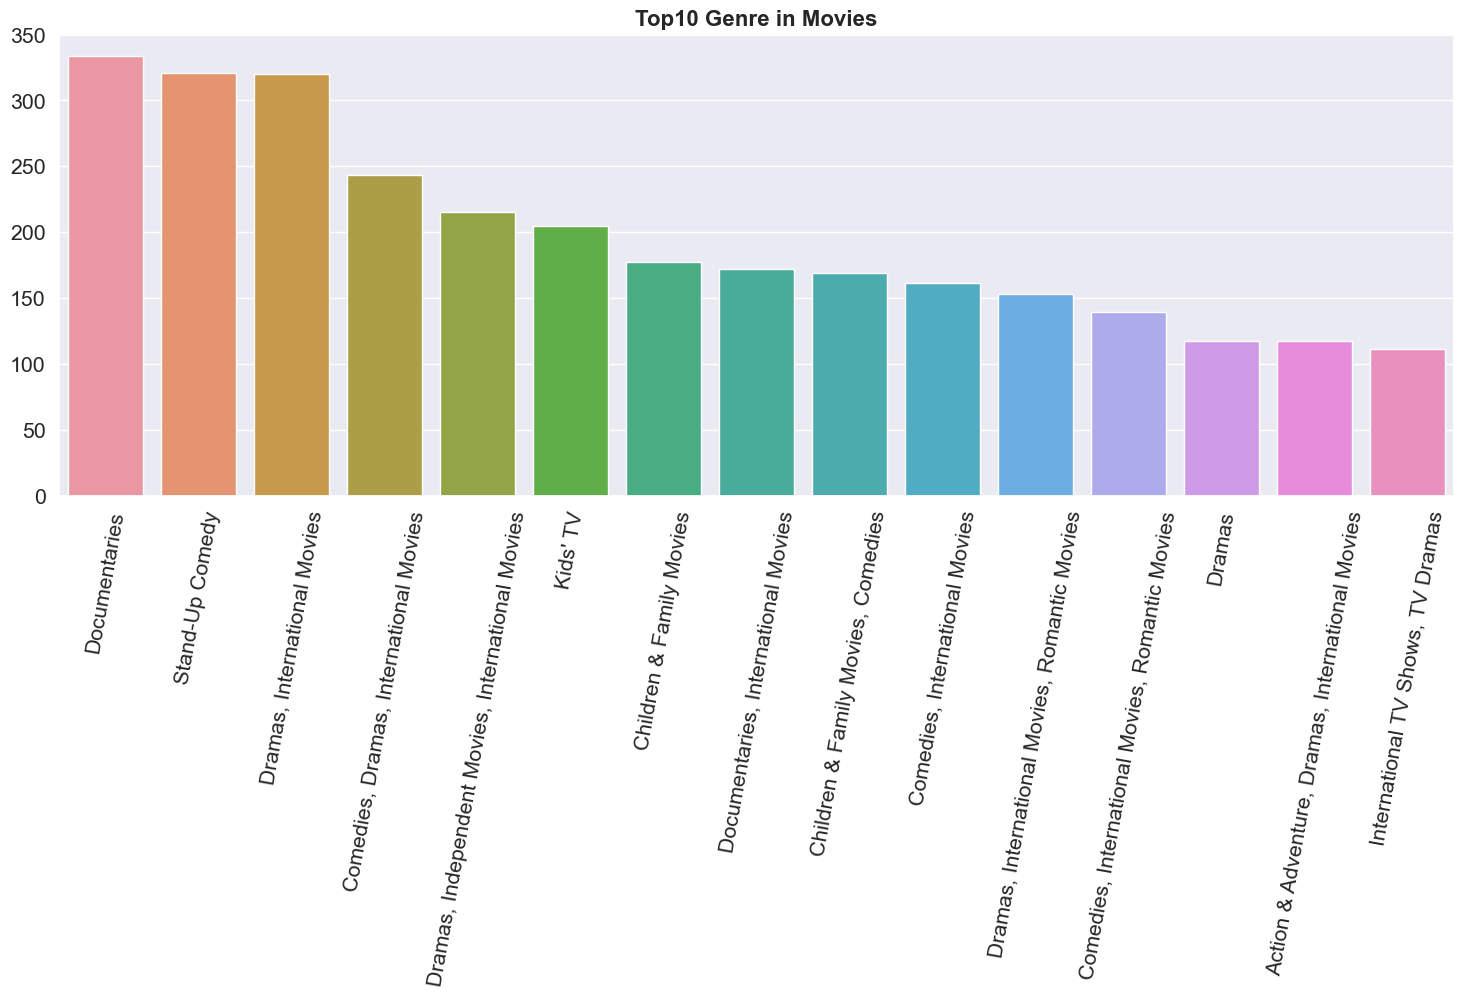

In [70]:
# Chart - 5 visualization code

# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values)
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here. I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is Genre and on y-axis it is count of movies/Tv Shows.

##### 2. What is/are the insight(s) found from the chart?

The Documentaries, Stand_up comedy and Dramas,International Movies is very famous and most contents available in Netflix has same genre.

#### Chart - 6

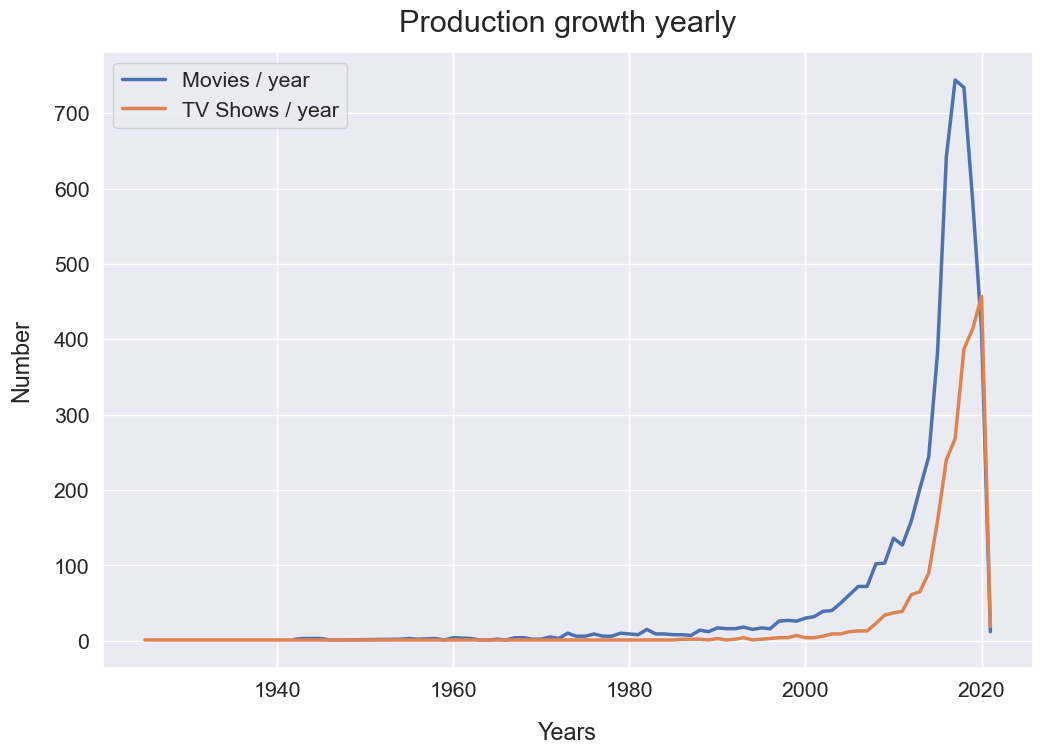

In [71]:
# Chart - 6 visualization code

# visualizing the movies and tv_shows based on the release year


movies_year =movie['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_show['release_year'].value_counts().sort_index(ascending=False)


sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, label="Movies / year")
tvshows_year.plot(figsize=(12, 8), linewidth=2.5,label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22)
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

line plot helps us to identify and see the trend clearly especially over time. My aim is to know the count of total number of contents became available  over time. 


##### 2. What is/are the insight(s) found from the chart?

As we can see that Netflix acheived its peak between 2017 to 2020. This may because of Corona. Because because of corona people stayed in their house which make them to spend more time in internet.So it is clearly understood by Netflix and they make sure to own more contents in that period to attract more subscribers over other OTT platform.

#### Chart - 7

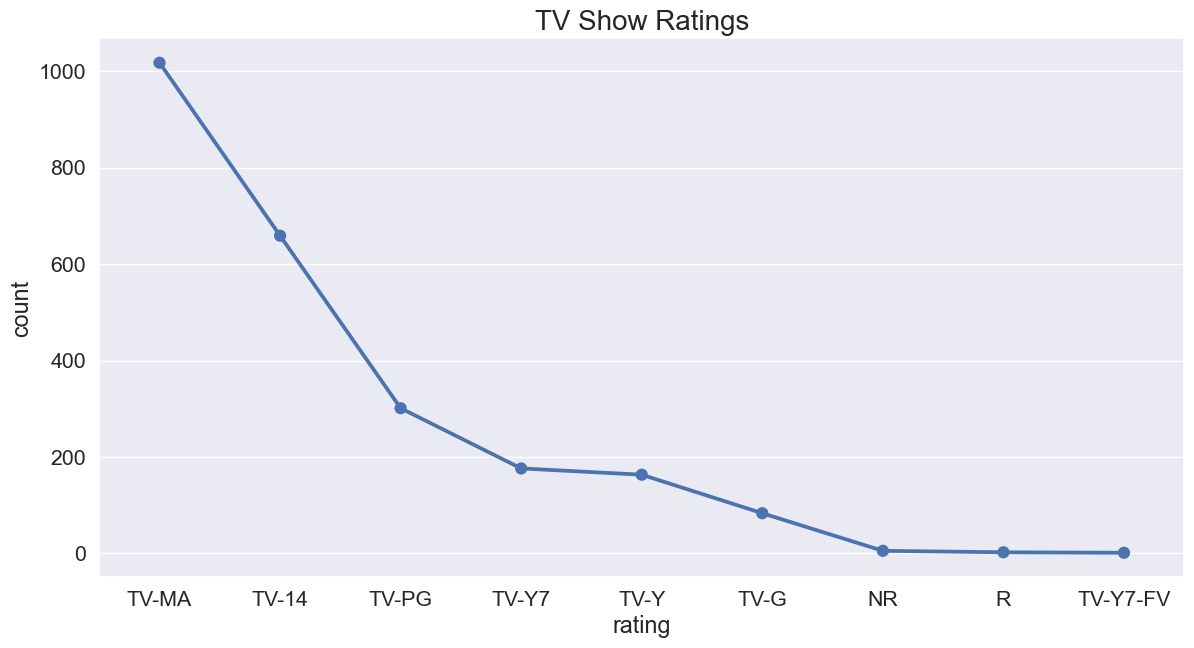

In [72]:
# Chart - 7 visualization code
#Rating based on rating system of all TV Shows

tv_ratings = tv_show.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

line plot helps us to find the trend among different category. Here in this we are counting the total of different movies/tv shows ratings.

##### 2. What is/are the insight(s) found from the chart?

TV-MA rating category content is more available in Netflix and followed by TV-14

#### Chart - 8

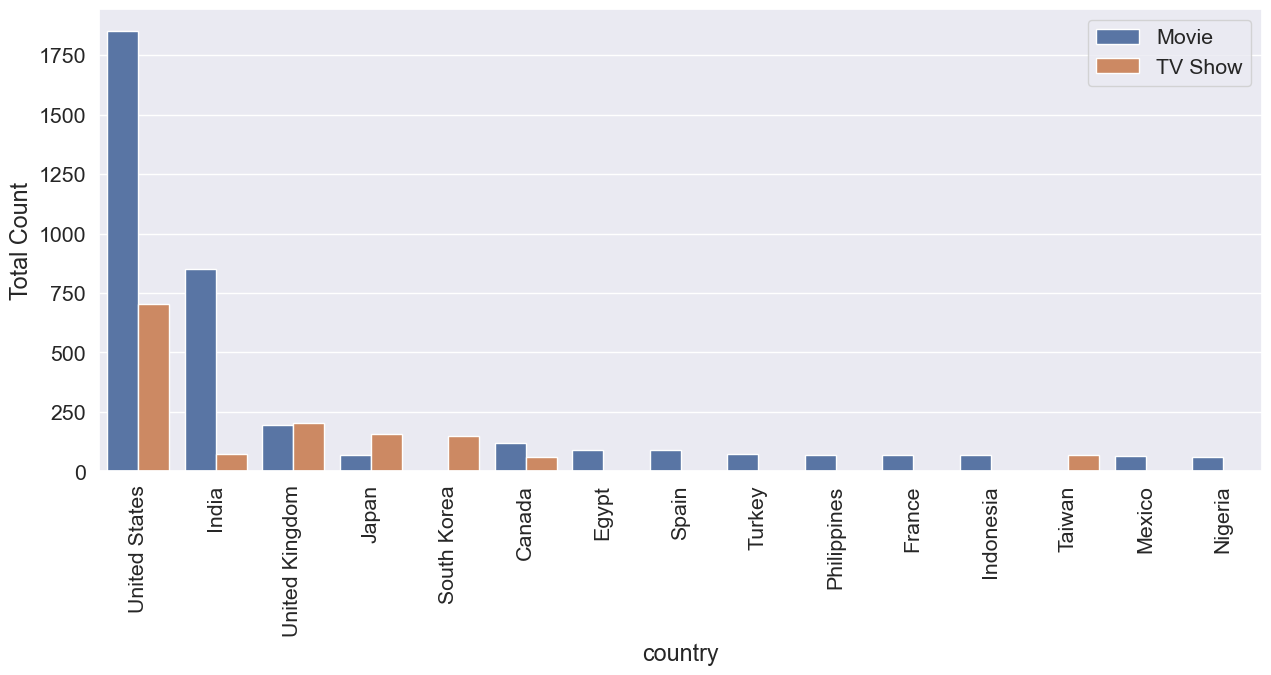

In [73]:
## Chart - 8 visualization code
# Count of TVshow and Movie produced in different country 


df_country = df.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
plt.figure(figsize = (15, 6))
sns.barplot(data = df_country, x = df_country['country'][:20], y = df_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.ylabel('Total Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose bar chart with subplot option in python. I chose bar chart because it helps to understand the data with categorical and numberical feature. Here our categorical data is Country and on y-axis it is count of TV shows and movies

##### 2. What is/are the insight(s) found from the chart?

As we seen in the word cloud Netflix has more number of United States's Tv shows and Movies. Followed by India, which has highest number of movies and very low number of TV_shows comparing to the others.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO (Null Hypothesis): Netflix has greater or equal to number of movies collectively.

H1 (Alternate Hypothesis):Netflix has always less number of movies than TV-show collectively. 

#### 2. Perform an appropriate statistical test.

In [74]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind
import numpy as np

movie_grp = df.groupby(['type',df.date_added.dt.year])['show_id'].count()['Movie']
tv_show = df.groupby(['type',df.date_added.dt.year])['show_id'].count()['TV Show']



movie_grp_mean = np.mean(movie_grp)
tv_show_mean = np.mean(tv_show)

print("Movie Group mean value:",movie_grp_mean)
print("TV_Show mean value:",tv_show_mean)

value_for_mean_std = np.std(movie_grp)
overall_std = np.std(tv_show)

print("Movie std value:",value_for_mean_std)
print("TV_Show std value:",overall_std)

ttest,pval = ttest_ind(movie_grp,tv_show)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Movie Group mean value: 384.07142857142856
TV_Show mean value: 240.0
Movie std value: 554.0097297090051
TV_Show std value: 262.9437202140412
p-value 0.47264371670508765
we accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

I did Two-sample T-test.A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

##### Why did you choose the specific statistical test?

 The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. 
 The One Sample t Test is a parametric test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

#### 2. Perform an appropriate statistical test.

In [75]:
df_hypothesis = df.copy(deep=True)
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])

#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')

In [76]:
# Perform Statistical Test to obtain P-Value

import numpy as np
from scipy import stats


movie_grp = group_by_.get_group('Movie')
tv_show = group_by_.get_group('TV Show')



movie_grp_mean = np.mean(movie_grp)
tv_show_mean = np.mean(tv_show)

print("Movie Group mean value:",movie_grp_mean)
print("TV_Show mean value:",tv_show_mean)

movie_grop_std = np.std(movie_grp)
tv_show_std = np.std(tv_show)

print("Movie std value:",value_for_mean_std)
print("TV_Show std value:",overall_std)


#length of groups and DOF
n1 = len(movie_grp)
n2= len(tv_show)


dof = n1+n2-2

sp_2 = ((n2-1)*movie_grop_std**2  + (n1-1)*tv_show_std**2) / dof

sp = np.sqrt(sp_2)

#tvalue
t_val = (movie_grp_mean-tv_show_mean)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


if (stats.t.ppf(0.025,dof) < t_val[0]) and (t_val[0] < stats.t.ppf(0.975,dof)):
    print("We Accept the Null Hypothesis")
else : 
    print("We reject the Null Hypothesis")

Movie Group mean value: duration    99.307978
dtype: float64
TV_Show mean value: duration    1.775934
dtype: float64
Movie std value: 554.0097297090051
TV_Show std value: 262.9437202140412
tvalue 249.84199693776182
We reject the Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I did Two-sample T-test.A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

##### Why did you choose the specific statistical test?

 The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. 
 The One Sample t Test is a parametric test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [77]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

The Description is the only features which I need for training ML model, and I don't have any missing values in the Description feature so there is no need to handle impute any missing values.

### 2. Handling Outliers

In [78]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no outliers as I am going use only Description Feature.

### 3. Categorical Encoding

In [79]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

I going to handle only text data here so, I am not going to taking care of other variables here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [80]:
#decoding non-utf-8 characters
def remove_non_utf8_words(df,features_names):
    df = df.copy()
    for feature in features_names:
        df[feature] = df[feature].apply(lambda x : x.replace('â€™',"'"))
        df[feature] = df[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
    return df

In [81]:
# Expand Contraction
def expand_contractions(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : " ".join(x.split()))
        df[feature] = df[feature].apply(lambda x : contractions.fix(x))
    return df



#### 2. Lower Casing

In [82]:
# Lower Casing
def change_to_lower_case(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : x.lower())
    return df

#### 3. Removing Punctuations

In [83]:
# Remove Punctuations
def remove_punctuations(df,features_columns):
    df = df.copy()
    punctuations = string.punctuation
    for feature in features_columns:
        df[feature] = df[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
    return df

#### 4. Removing URLs & Removing words and digits contain digits.

In [84]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(df,feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
    return df

def remove_words_with_digits(df, feature_names):
    df = df.copy()
    for feature in feature_names:
        df[feature] = df[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
    return df

#### 5. Removing Stopwords & Removing White spaces

In [85]:
# Remove Stopwords
def remove_stopwords(df,features_names):
    df = df.copy()
    eng_stopwords = set(stopwords.words('english'))
    for feature in features_names:
        df[feature] = df[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
    return df

#### 6. Tokenization and Text Normalization

In [86]:
# Tokenization
def tokenize_and_normalization(df,feature_names):
    lemmatizer=WordNetLemmatizer()
    for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
            
    return df

##### Which text normalization technique have you used and why?

I using Lemmatization normalization because it will do better than stemming. In stemming, there is chance that it will change the word completely. But in case of Lemmatization, it is not the case, it will try to maintain the original context of the sentence.

#### 7. Text Vectorization

In [87]:
class CustomTextDataPreprocessing(BaseEstimator,TransformerMixin):
    
    def __init__(self,feature_names):
        self.feature_names = feature_names
        return None
    
    #decoding non-utf-8 characters
    def remove_non_utf8_words(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : x.replace('â€™',"'"))
            df[feature] = df[feature].apply(lambda x : ''.join([c for c in x if ord(c) < 128]))
        return df
    
    # Expand Contraction
    def expand_contractions(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : " ".join(x.split()))
            df[feature] = df[feature].apply(lambda x : contractions.fix(x))
        return df
    
        # Lower Casing
    def change_to_lower_case(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : x.lower())
        return df

        # Remove Punctuations
    def remove_punctuations(self,df,features_names):
        df = df.copy()
        punctuations = string.punctuation
        for feature in features_names:
            df[feature] = df[feature].apply(lambda x : x.translate(str.maketrans('','',punctuations)))
        return df
    
    # Remove URLs & Remove words and digits contain digits
    def remove_urls(self,df,feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :  re.sub(r'^https?:\/\/.*[\r\n]*', '', x))
        return df

    def remove_words_with_digits(self,df, feature_names):
        df = df.copy()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x : " ".join(s for s in x.split() if not any(c.isdigit() for c in s)))
        return df
    
    # Remove Stopwords
    def remove_stopwords(self,df,feature_names):
        df = df.copy()
        eng_stopwords = set(stopwords.words('english'))
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda text: " ".join(word for word in text.split() if not word in eng_stopwords))
        return df

    # Tokenization
    def tokenize_and_normalization(self,df,feature_names):
        lemmatizer=WordNetLemmatizer()
        for feature in feature_names:
            df[feature] = df[feature].apply(lambda x :" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
            
        return df
     

    def fit(self,df):
        return self
    
    def transform(self,df):
        df =df.copy()
        #removing non utf8 words
        df = self.remove_non_utf8_words(df,self.feature_names)
        #expanding contractions 
        df = self.expand_contractions(df,self.feature_names)
        #changing all to lower case
        df = self.change_to_lower_case(df,self.feature_names)
        #remvoing punctuations
        df = self.remove_punctuations(df,self.feature_names)
        #removing urls
        df = self.remove_urls(df,self.feature_names)
        #removing words with digits
        df = self.remove_words_with_digits(df,self.feature_names)
        #remove stopwords
        df = self.remove_stopwords(df,self.feature_names)
        #remove tokenize and normalization
        df = self.tokenize_and_normalization(df,self.feature_names)
        

        return df
        

In [88]:
# Vectorizing Text
class CustomTfidVectorizer(BaseEstimator,TransformerMixin):
    def __init__(self,feature_name,max_features = None):
        self.max_features = max_features
        self.feature_name = feature_name
        return None
    
    def fit(self,df):
        self.TfidVectorizer = TfidfVectorizer(max_features= self.max_features)
        self.TfidVectorizer.fit(df[self.feature_name])
        return self
    
    def transform(self,df):
        df = df.copy()
        vectors = self.TfidVectorizer.transform(df[self.feature_name]).toarray()
        df[self.TfidVectorizer.get_feature_names()] = vectors
        df.drop(self.feature_name,axis = 1,inplace = True)
        return df

##### Which text vectorization technique have you used and why?

Term frequency-inverse document frequency ( TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.Not like Bag of words and Count Vector technique which treats all words equally,TF-IDF can distinguish very common words or rare words

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [89]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [90]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

I am going to use only Description feature so I am going to drop rest of the columns.

##### Which all features you found important and why?

I am going to use all the features got from vectorization.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [91]:
# Transform Your data

### 7. Data Scaling

In [92]:
# Scaling your data

##### Which method have you used to scale you data and why?

There is no need to scale the data I've finally got, I've checked the data, the vectorization got is actually already in normalized form.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [93]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I am going to use all the features which I got after vectorization to maintain the information. Dimensionality Reduction doing in the vectorization may loose its meaning of every vector.

### 9. Data Splitting

In [94]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

No need to split the data as it is unsupervised problem, we cannot test the result of model by having the test data. so, I am going to use the whole dataset for training.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [95]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [96]:
#using pipeline to transform our text data
text_feature_pipeline = Pipeline([
    ('text_preprocessing',CustomTextDataPreprocessing(feature_names=['description'])),
    ('vectorization',CustomTfidVectorizer(feature_name='description',max_features=400))
])


In [97]:
description_feature_vector = text_feature_pipeline.fit_transform(df).iloc[:,11:]

In [98]:
#printing the shapes of our data
print("Train data: ",description_feature_vector.shape)

Train data:  (7787, 398)


### ML Model - 1

In [99]:
SEED = 10

In [100]:
# ML Model - 1 Implementation
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score
ssd= []  
  
#Using for loop for iterations from 1 to 30.  
for cluster in range(2, 15):  
    kmeans = KMeans(n_clusters=cluster,random_state= SEED)  
    kmeans.fit(description_feature_vector)  
    preds = kmeans.predict(description_feature_vector)
    score = silhouette_score(description_feature_vector, preds)
    print("For n_clusters = {}, Silhouette score is {}".format(cluster, score))
    ssd.append(kmeans.inertia_)  


For n_clusters = 2, Silhouette score is 0.0058114495418493005
For n_clusters = 3, Silhouette score is 0.008043664935918897
For n_clusters = 4, Silhouette score is 0.009877858841873978
For n_clusters = 5, Silhouette score is 0.012611311910052094
For n_clusters = 6, Silhouette score is 0.01335808902539868
For n_clusters = 7, Silhouette score is 0.014711530849232948
For n_clusters = 8, Silhouette score is 0.016309194005790013
For n_clusters = 9, Silhouette score is 0.018034025198192687
For n_clusters = 10, Silhouette score is 0.018974231867327537
For n_clusters = 11, Silhouette score is 0.01957670705838804
For n_clusters = 12, Silhouette score is 0.021795528145757536
For n_clusters = 13, Silhouette score is 0.02167002315791917
For n_clusters = 14, Silhouette score is 0.022607211755347974


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

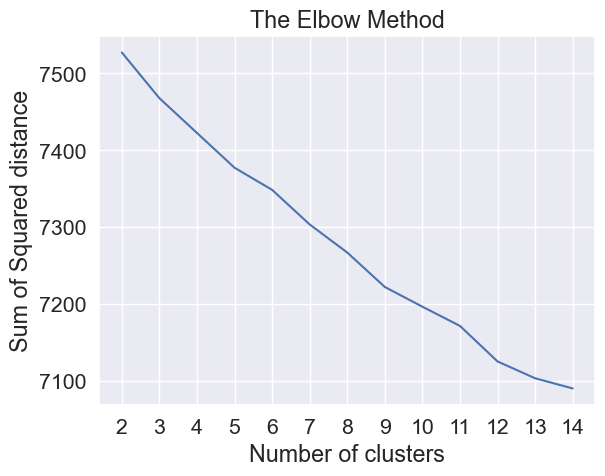

In [101]:
# Visualizing evaluation Metric Score chart
plt.plot(range(2, 15), ssd)  
plt.xticks(range(2,15))
plt.title('The Elbow Method')  
plt.xlabel('Number of clusters')  
plt.ylabel('Sum of Squared distance')  
plt.show()


From the above Elbow method and silhouette score I am choosing 12 would be the perfect number of clusters for this problem. So I am finally training kmeans with 12 clusters.

In [102]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 12, init='k-means++', random_state= SEED)  
y_predict= kmeans.fit_predict(description_feature_vector) 

In [103]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(description_feature_vector, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.021795528145757536


In [104]:

#Reducing the number of features to visualize it in 2D or 3D plot
pca = PCA(n_components = 3)
X = pca.fit_transform(description_feature_vector)


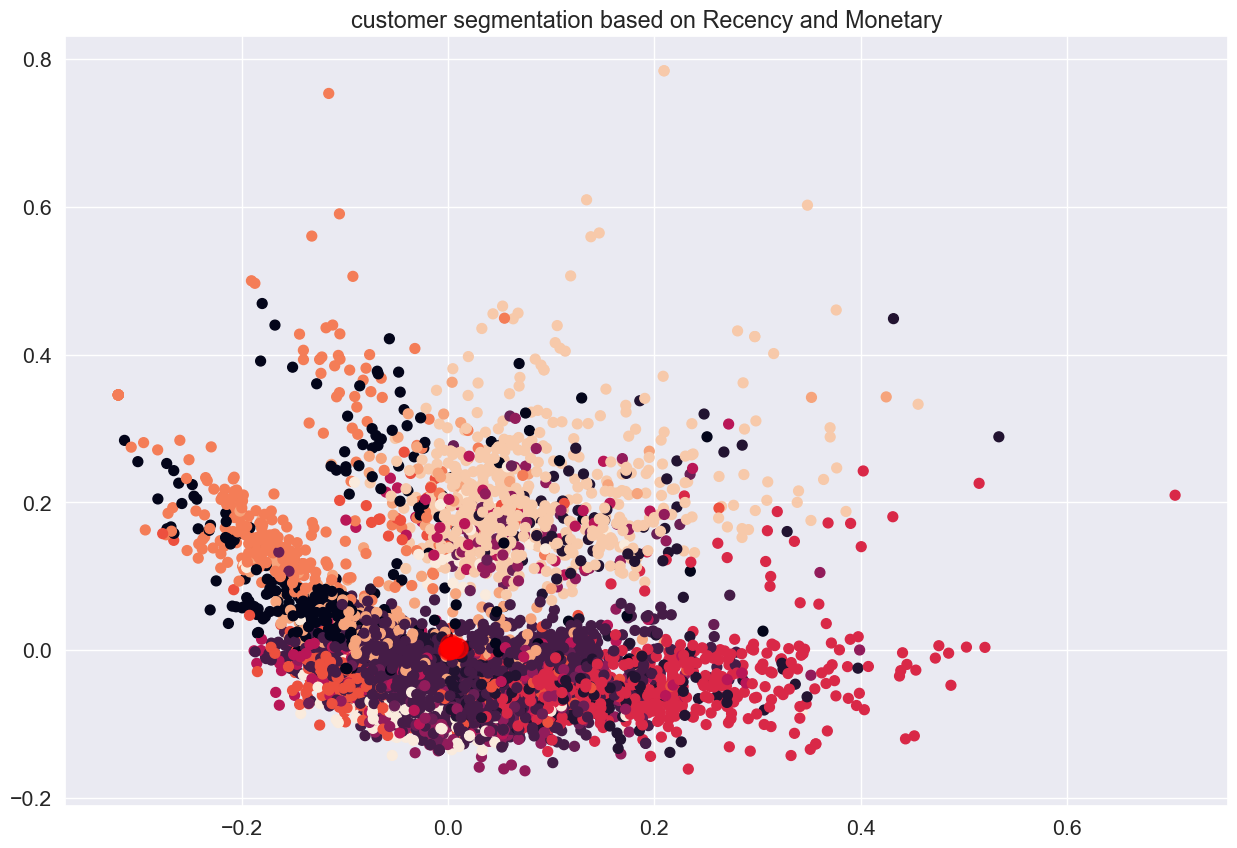

In [105]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

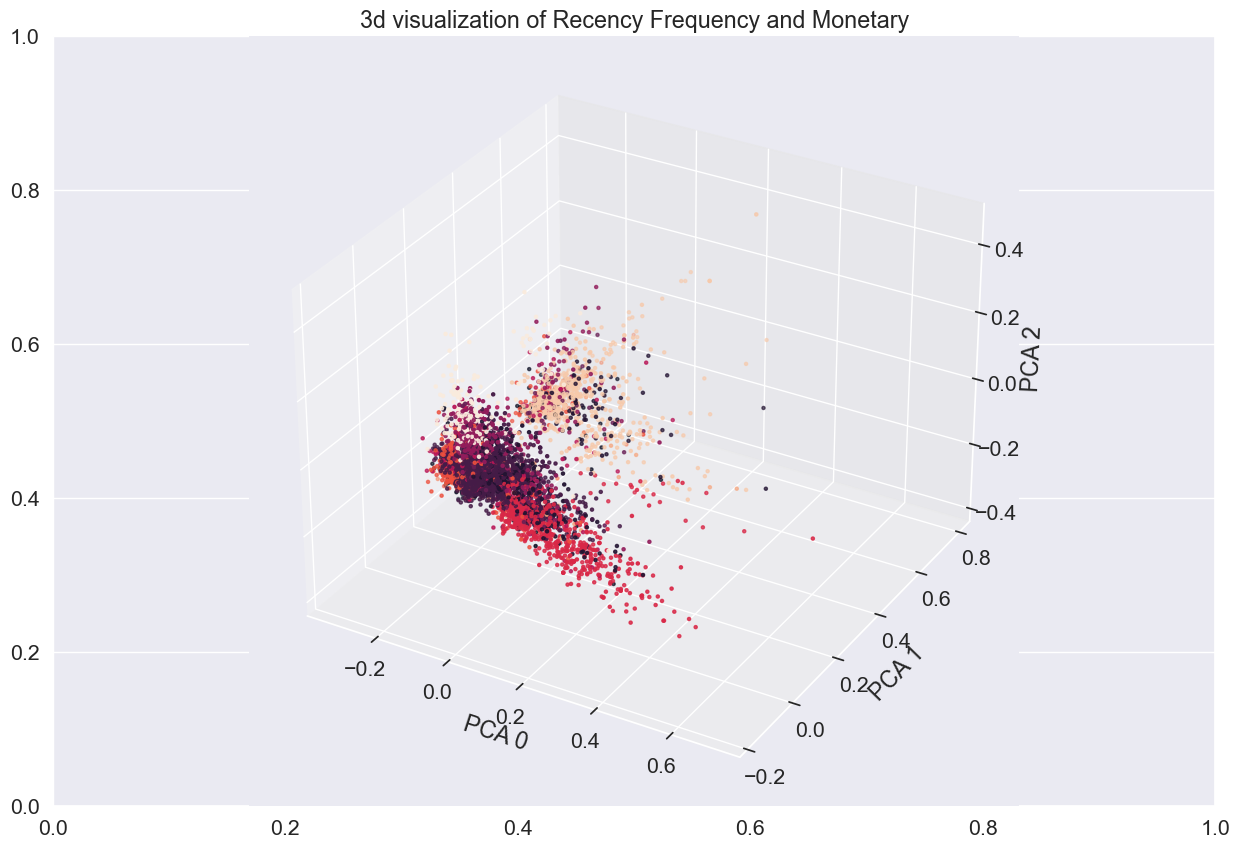

In [106]:
#plotting 3D Graph
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=X[:,0]
ys=X[:,1]
zs=X[:,2]
ax.scatter(xs,ys,zs,s=5,c = y_predict)
ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')
plt.show()

At the end, from the 2D and 3D plot we can say that K-means done not a bad job, but we cannot get into a conclusion by plotting this PCA features.

### ML Model - 2

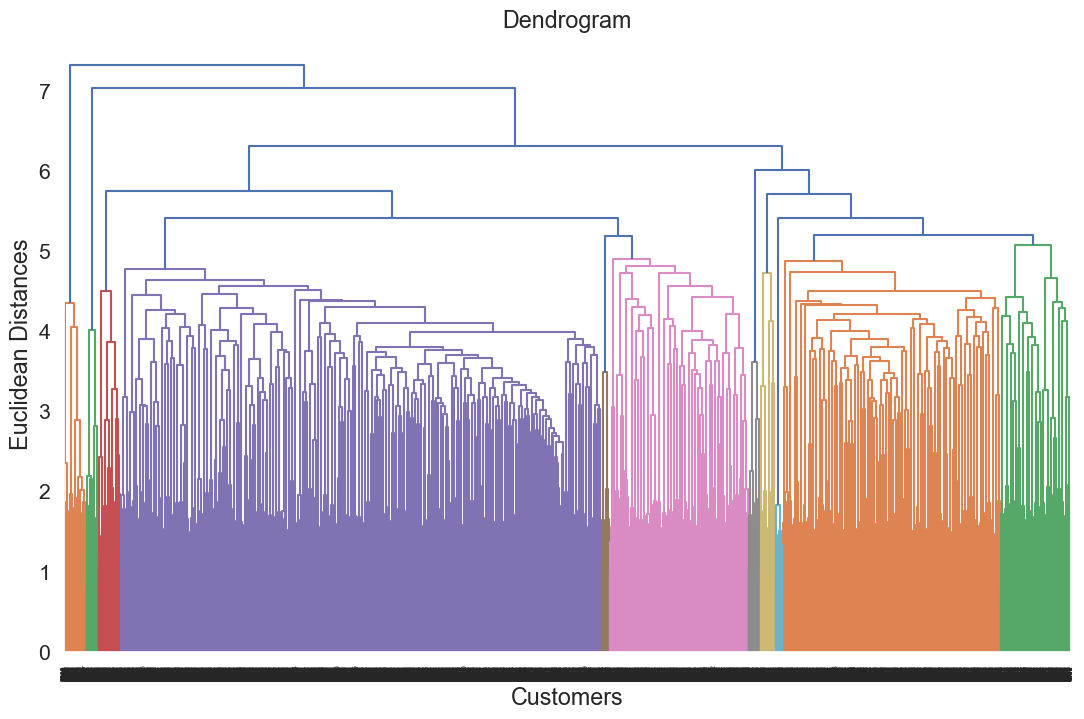

In [107]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(description_feature_vector, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [108]:
# ML Model - 2 Implementation

from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters= 9, affinity='euclidean', linkage='ward')  
aggh.fit(description_feature_vector)
#Predicting using our model
y_hc=aggh.fit_predict(description_feature_vector)

In [109]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(description_feature_vector,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.006


### ML Model - 3

In [110]:
#model 3

#finding optimal number of clusters using the elbow method  
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_range=range(6,12) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(5,14)

silhouette_scores= []  
comb = []
  
#Using for loop for iterations from 1 to 30.  
for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters+
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(description_feature_vector)
        # Calculate Silhoutte Score and append to a list
        silhouette_scores.append(silhouette_score(description_feature_vector, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

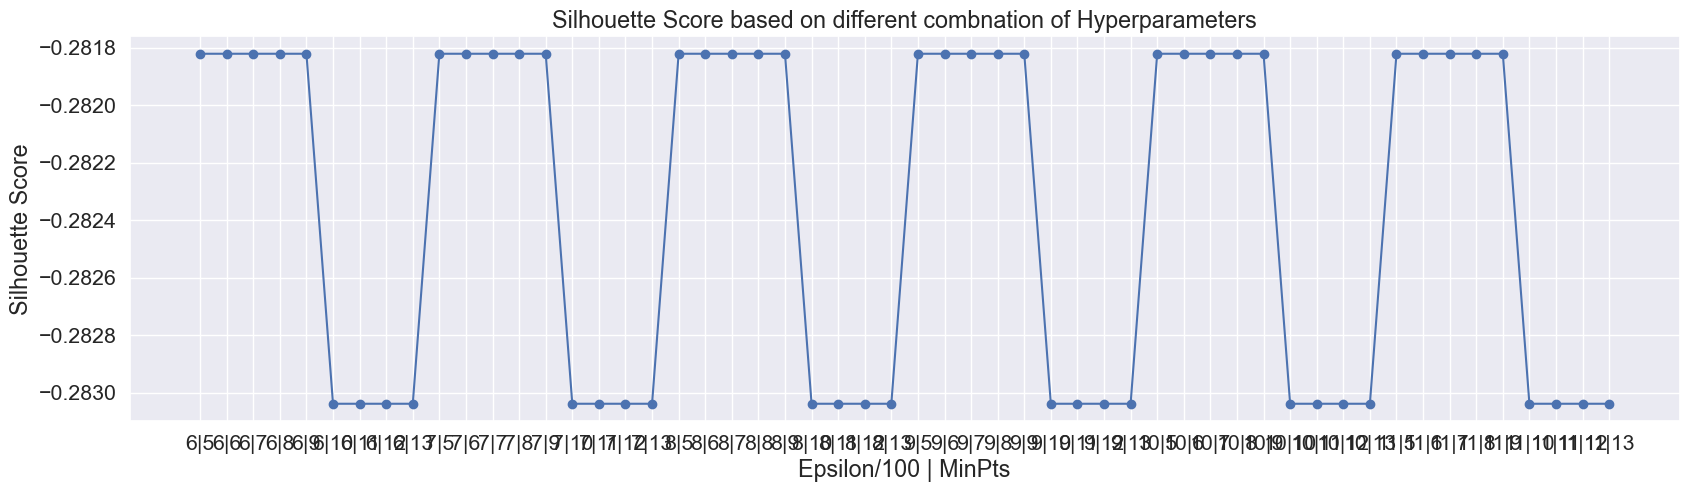

In [111]:
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(20,5))
plt.plot(comb, silhouette_scores, 'bo-')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

Looking at the above, we can see that eps=0.08 produce the highest scores.
A few combinations ended up having very similar scores, indicating that the clustering output for those combinations would also be similar.

In [112]:
final_model = DBSCAN(eps=6/100, min_samples=5)
clm = model.fit(description_feature_vector)
print(silhouette_score(description_feature_vector, clm.labels_, metric='euclidean'))


-0.2830383756504725


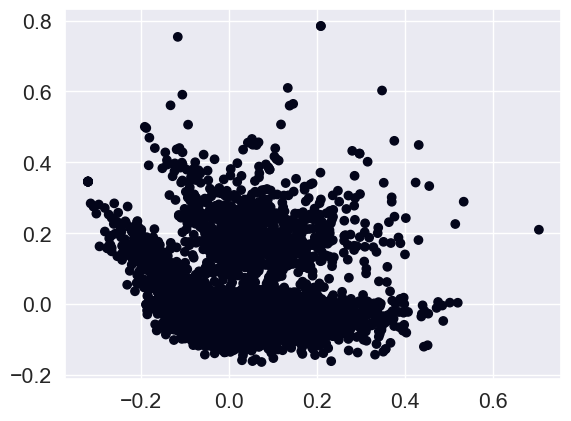

In [113]:
plt.scatter(X[:,0], X[:,1], c= clm.labels_)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score helped us to find the best model. And helped us to choose the best model among these.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

K-Means did better job in this dataset. It gives the insight that 12 is the perfect number of cluster, but Incase of Aggloramative Clustering  we saw that the 9 is the optimal cluster.Might be 9 is better, but I chose 12 in K-means, I got  a better result with that using k-means. And DBSCAN doen't perform well in this dataset.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [114]:
# Save the File

filename = 'netflix_agglormative_model.sav'
joblib.dump(aggh, filename)

['netflix_agglormative_model.sav']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

loaded_model = joblib.load(filename)
result = loaded_model.predict(description_feature_vector)
print(result)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We had given the problem of unsupervised clustering using Netflix Dataset. Initially we run some basic python code snippets to understand more about the data especially its shape, no.of features, datatypes, statical information etc.. Then in EDA part we analysed the data and found :


Netflix has more number of TV_shows and Movies belongs to United States.

Netflix acheived its peak in owning the number of contents between 2017 to 2020. 

Netflix has more number of United States's Tv shows and Movies. Followed by India, which has highest number of movies and very low number of TV_shows comparing to the others.


Clustering:

In K-means which did better, said 12 should be the better cluster.I case of Agglomerative Clustering which too did best job in the Silhoutte score and using the dendogram I found that 9 should be the perfect cluster for this model. But finally using the Silhoutte score I concluded that K-Means did very nice job with 12 clusters.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***